In [1]:
%matplotlib inline
import random
import os
import json
import sys
import string
import unicodedata
#from tqdm import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
#Given local path, find full path
def PathFinder(path):
    script_dir = os.path.dirname('__file__')
    fullpath = os.path.join(script_dir,path)
    return fullpath

#Read Data for Deep Learning
def ReadData(path):
    fullpath=PathFinder(path)
    return np.loadtxt(fullpath,delimiter=',')

In [3]:
learning1=ReadData('../DATA/VIZ/HVAC_learning_rate/log1.txt')
learning01=ReadData('../DATA/VIZ/HVAC_learning_rate/log01.txt')
learning001=ReadData('../DATA/VIZ/HVAC_learning_rate/log001.txt')
learning0001=ReadData('../DATA/VIZ/HVAC_learning_rate/log0001.txt')

In [4]:
data = np.stack((learning1[:,1], learning01[:,1],learning001[:,1],learning0001[:,1]),axis=-1)

In [5]:
data

array([[-665798.38 , -665650.94 , -665898.75 , -665802.75 ],
       [-307249.25 , -642996.81 , -663720.25 , -665585.62 ],
       [-350363.84 , -624822.81 , -662124.56 , -665428.   ],
       ..., 
       [-178760.31 ,  -40469.656,  -25419.836, -143320.16 ],
       [-172467.14 ,  -40544.441,  -25432.42 , -143148.08 ],
       [-180664.66 ,  -40670.203,  -25411.43 , -142976.12 ]])

In [6]:
df = pd.DataFrame(data, columns=['Optimizing_Rate:1','Optimizing_Rate:0.1','Optimizing_Rate:0.01','Optimizing_Rate:0.001'])

In [7]:
df

,Optimizing_Rate:1,Optimizing_Rate:0.1,Optimizing_Rate:0.01,Optimizing_Rate:0.001
0,-665798.38,-665650.940,-665898.750,-665802.75
1,-307249.25,-642996.810,-663720.250,-665585.62
2,-350363.84,-624822.810,-662124.560,-665428.00
3,-535163.06,-608365.810,-660778.810,-665295.94
4,-391229.44,-592724.620,-659576.810,-665178.69
5,-177490.12,-577454.560,-658469.440,-665071.06
6,-132265.20,-562308.810,-657429.060,-664970.50
7,-112404.97,-547123.060,-656438.750,-664875.12
8,-135395.52,-531779.190,-655487.060,-664783.75
9,-160555.81,-516187.160,-654565.690,-664695.69


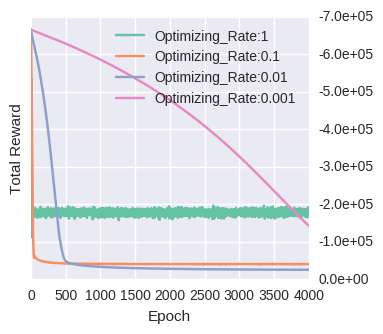

In [10]:
current_palette = sns.color_palette("Set2", 10)
ax=df.plot(color=current_palette,figsize=(4,3.5))
ax.yaxis.tick_right()
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))
plt.ylabel('Total Reward')
plt.xlabel('Epoch')
plt.tight_layout()
plt.legend(fancybox=True,loc='upper right', prop={'size':10})
plt.gca().invert_yaxis()
plt.savefig('../PLOTS/HVAC_Learning_Rate.eps',format='eps')